\begin{center} by Ibis Prevedello (1794539) \end{center}

# Introduction
The goal of this project is to train a classifier using LeNet architecture in order to classify different categories of boats navigating in the City of Venice (Italy).

The dataset that is being used here is the [MarDCT](http://www.dis.uniroma1.it/~labrococo/MAR/index.htm) from the Sapienza University of Rome.

The training dataset contains 4.774 images and the test dataset contains 1.969 from 24 different categories.

# Development
Below the development of the project is detailed, commenting each of the functions and steps given to achieve the desired goals for the project.

## Import necessary libraries for the project
In the following block is listed all the necessary libraries for the project, the seed for the random numbers and the path for the folder containing.

In [1]:
# Difine libraries
from tqdm import tqdm
from textwrap import wrap
from sklearn.utils import shuffle
from sklearn import preprocessing

import os, os.path
import random
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

# Set seed for random numbers
random.seed(1)

# Define folder where the log files are located
train_folder = 'training/'
test_folder = 'test/'

# Define the image size for the CNN
size_image = 90

## Dictionary of classes
Because the dataset is too big and my computer cannot handle to keep in memory the whole dataset, the two dictionaries below are used to select which classes to be used from the training and test dataset.

In [2]:
# Dictionary with classes
dict_train = {
    #'Alilaguna':0,
    #'Ambulanza':1,
    #'Barchino':2,
    #'Cacciapesca':3,
    #'Caorlina':4,
    #'Gondola':5,
    #'Lanciafino10m':6,
    'Lanciafino10mBianca':7,
    'Lanciafino10mMarrone':8,
    #'Lanciamaggioredi10mBianca':9,
    #'Lanciamaggioredi10mMarrone':10,
    'Motobarca':11,
    #'Motopontonerettangolare':12,
    #'MotoscafoACTV':13,
    'Mototopo':14,
    'Patanella':15,
    #'Polizia':16,
    #'Raccoltarifiuti':17,
    #'Sandoloaremi':18,
    #'Sanpierota':19,
    #'Topa':20,
    'VaporettoACTV':21,
    #'VigilidelFuoco':22,
    'Water':23
    #'SnapshotBarcaParziale':24,
    #'SnapshotBarcaMultipla':25
}

dict_test = {
    #'Alilaguna':0,
    #'Ambulanza':1,
    #'Barchino':2,
    #'Cacciapesca':3,
    #'Caorlina':4,
    #'Gondola':5,
    #'Lancia: fino 10 m':6,
    'Lancia: fino 10 m Bianca':7,
    'Lancia: fino 10 m Marrone':8,
    #'Lancia: maggiore di 10 m Bianca':9,
    #'Lancia: maggiore di 10 m Marrone':10,
    'Motobarca':11,
    #'Motopontone rettangolare':12,
    #'Motoscafo ACTV':13,
    'Mototopo':14,
    #'Mototopo corto':14,
    'Patanella':15,
    #'Polizia':16,
    #'Raccolta rifiuti':17,
    #'Sandolo a remi':18,
    #'Sanpierota':19,
    #'Topa':20,
    'Vaporetto ACTV':21,
    #'Vigili del Fuoco':22,
    'Snapshot Acqua':23
    #'Snapshot Barca Parziale':24,
    #'Snapshot Barca Multipla':25
}

# Invert dictionary keys and values to be used in the plots
dict_test_inverse = dict((v,k) for k, v in dict_test.items())

## Save and load pick file
Functions used to save and load the vector of images to a pickle file. It facilitates the work because reading one single file is much faster than reading image by image to create the dataset.

In [3]:
# Save data to file
def save_data(X, y, name):
    with open(name + '.p', 'wb') as f:
        pickle.dump({'features':X, 'labels':y}, f, pickle.HIGHEST_PROTOCOL)

# Load data from file
def load_data(name):
    with open(name + '.p', 'rb') as f:
        return pickle.load(f)

## Training dataset

Try to find the pickle file in the folder, if the file is not found, the dataset need to be create. In order to create the dataset, first it reads image by image from the folders, resize (because the images are really big for a good classification and my graphic card) and append to the training vector.

In [4]:
# List for files
X_train = list()
y_train = list()
    
if os.path.isfile('training.p'):
    print('Training file found!')
    with open('training.p', mode='rb') as f:
        train = pickle.load(f)
    X_train, y_train = train['features'], train['labels']
else:
    print('Training file not found!')

    for i in os.listdir(train_folder):
        subfolder = train_folder + i + "/"
        if os.path.isdir(subfolder):
            files = os.listdir(subfolder)

            # If file is in classes to be classified
            if i in dict_train:
                pbar = tqdm(range(len(files)))
                pbar.set_description('Processing \'' + i + '\'')

                # For each file
                for j in pbar:
                    f = files[j]
                    image = cv2.resize(plt.imread(subfolder + f),
                                       (size_image,size_image),
                                       interpolation=cv2.INTER_LINEAR)
                    X_train.append(image)
                    y_train.append(dict_train[i])
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    # Save dictionary
    save_data(X_train, y_train, 'training')
    print('\nTraining saved to file!')

Training file not found!


Processing 'Water': 100%|███████████████████████████████████████████████████████████| 907/907 [00:06<00:00, 147.67it/s]



Training saved to file!


## Test dataset
The process to create the test dataset is basically the same as the training dataset, but here it is a little bit different because the files are all together, not divided by folders and the labels are in a txt file with names in different formats from the folders names used above.

In [5]:
# List for files
X_test = list()
y_test = list()
    
# load test files
if os.path.isfile('test.p'):
    print('Test file found!')
    with open('test.p', mode='rb') as f:
        test = pickle.load(f)
    X_test, y_test = test['features'], test['labels']
else:
    print('Test file not found!')

    test_label_dictionary = {}
    for l in open(test_folder + 'ground_truth.txt', 'r'):
        file, name = l.strip().split(';')
        if name in dict_test:
            test_label_dictionary[file] = name

    pbar = tqdm(range(len(test_label_dictionary)))
    pbar.set_description('Processing test data')
    
    keys = list(test_label_dictionary)

    for f in pbar:
        image = cv2.resize(plt.imread(test_folder + keys[f]),
                           (size_image,size_image),
                           interpolation=cv2.INTER_LINEAR)
        X_test.append(image)
        y_test.append(dict_test[test_label_dictionary[keys[f]]])

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # Save dictionary
    save_data(X_test, y_test, 'test')
    print('\nTest saved to file!')

Test file not found!


Processing test data: 100%|████████████████████████████████████████████████████████| 1494/1494 [00:15<00:00, 96.80it/s]



Test saved to file!


The script below is used to print some basic information about the dataset, such as the number of files in each dataset, the shape of the images and the classes being classified.

In [6]:
# Number of training examples
n_train = len(X_train)

# Number of testing examples
n_test = len(X_test)

# Shape of the image
image_shape = X_test[0].shape

# Number of classes
n_classes = len(dict_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 4067
Number of testing examples = 1494
Image data shape = (90, 90, 3)
Number of classes = 7


# Visualize data

In order to give an overview of the images that will be classified, below a random example of each one is plotted with the number in each class.

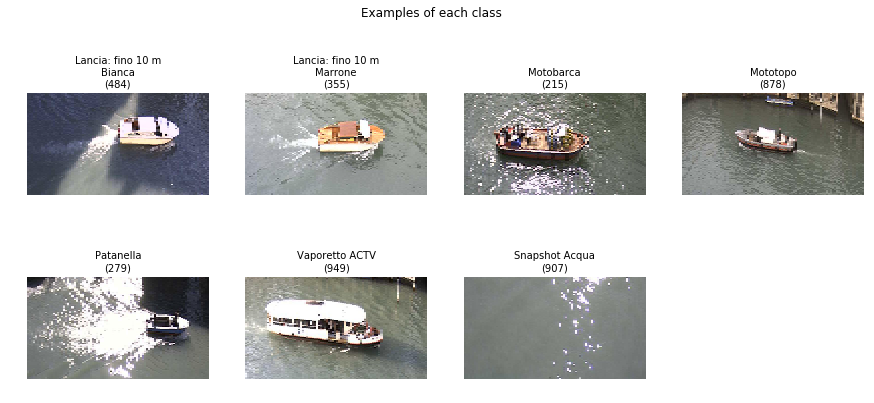

In [7]:
def visualize_data(X, y):
    rows = 4
    samples = list()

    fig = plt.figure(facecolor="white")
    fig.set_size_inches(15, 12)
    fig.subplots_adjust(hspace=.8)

    position = 0
    for i in dict_train:
        position += 1
        index_dic = dict_train[i]
        count = sum(y == index_dic)
        index = random.choice(np.where(y == index_dic)[0])

        ax=fig.add_subplot(rows,rows,position, aspect='equal')        
        ax.imshow(X[index])
        ax.axis('off')
        ax.set_title("\n".join(wrap(dict_test_inverse[index_dic],20)) +
                     "\n(" + str(count) + ")", fontsize = 10)
        ax.axis('tight')
    plt.suptitle('Examples of each class')
    
visualize_data(X_train, y_train)

This function is used to plot the number of classes in each dataset. For the test dataset it does not make any difference, because the goal is only to classify the images. However, for the training dataset it is important to have approximately the same number of examples in each class, in order to avoid training a biased classifier.

In [8]:
## Plot number of each examples in the test data
def plot_sample_class_distributions(samples, title):
    
    label_count = list()
    for i in dict_train:
        index_dic = dict_train[i]
        label_count.append((samples == index_dic).sum())

    indexes = np.arange(len(dict_test))

    fig = plt.figure(facecolor="white")
    fig.set_size_inches(12, int(len(dict_train)/2))
    ax = fig.add_subplot(111)
    ax.barh(indexes, label_count, alpha=0.75)
    ax.set_yticks(indexes)
    ax.set_yticklabels(dict_test, fontsize = 10)
    ax.set_ylabel('Boat Types', fontsize = 10)
    ax.set_xlabel('Number of Samples', fontsize = 10)
    ax.set_title(title, fontsize = 14)

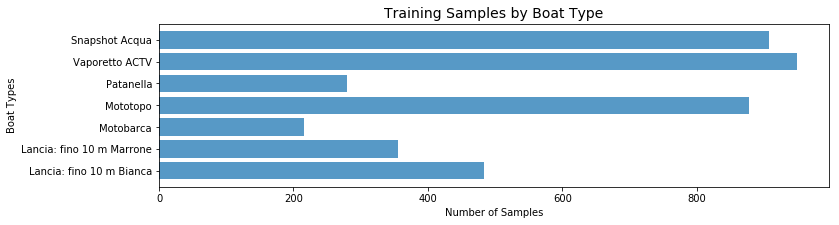

In [9]:
plot_sample_class_distributions(samples=y_train,
                                title='Training Samples by Boat Type')

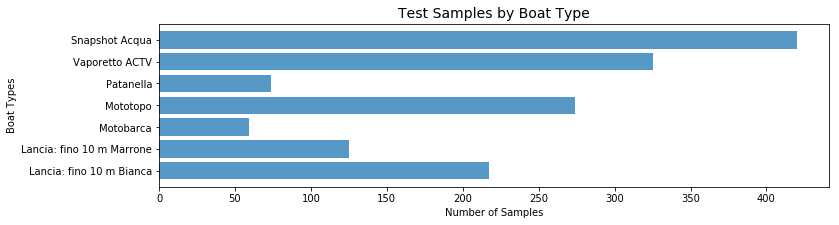

In [10]:
plot_sample_class_distributions(samples=y_test,
                                title='Test Samples by Boat Type')

## Data Augmentation
As shown above, the number of examples in each class is not the same, and to create a good classifier it is important to have balanced dataset.

In order to to this, it is possible to apply some transformations to the images, such as flip, rotation, translation, zoom, shadow, and thus create new ones that can be used by the classifier.

Although for us, seeing two slightly different images does not make any difference, for the classifier these augmentation cause a big impact and it can be really used as new dataset.

In [11]:
def flip_image(img, flip = False):
    if random.randint(0, 1) or flip:
        return cv2.flip(img, 1)
    else:
        return img

def brightness_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * (1 + np.random.uniform(-0.6, 0.0))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def rotate_image(img):
    rows,cols,channel = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),
                    random.uniform(-int(rows/5), int(rows/5)), 1)
    return cv2.warpAffine(img,M,(cols,rows), borderMode=1)

def translate_image(img):
    rows, cols, chs = img.shape
    horz_range=int(cols/10)
    vert_range=int(rows/10)
    tx = np.random.randint(-horz_range, horz_range+1)
    ty = np.random.randint(-vert_range, vert_range+1)
    tr_M = np.float32([[1,0,tx], [0,1,ty]])
    img = cv2.warpAffine(img, tr_M, (cols,rows), borderMode=1)
    return img

def shadow_image(img):
    rows, cols, chs = img.shape
    
    # Generate a separate buffer
    shadows = np.copy(img)

    randomUp = int(random.random() * cols)
    randomDown = int(random.random() * cols)
    
    if random.randint(0, 1):
        poly = [[randomUp,0],[cols,0],[cols,rows], [randomDown,rows]]
    else:
        poly = [[randomUp,0],[0,0],[0,rows], [randomDown,0]]
        
    cv2.fillPoly(shadows, np.array([poly]), -1)

    alpha = np.random.uniform(0.6, 0.9)
    cv2.addWeighted(shadows, alpha, img, 1-alpha, 0, shadows)
    return shadows

# Function to plot example data
def plot_example(image1, image2, title):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(5, 5)
    ax=fig.add_subplot(221)        
    ax.imshow(image1)
    ax.axis('off')
    ax.axis('tight')
    ax=fig.add_subplot(222) 
    ax.imshow(image2)
    ax.axis('off')
    ax.axis('tight')
    plt.suptitle(title)
    
img = np.copy(random.choice(X_train))

### Data augmentation examples
Below is presented an example of each transformation described above.

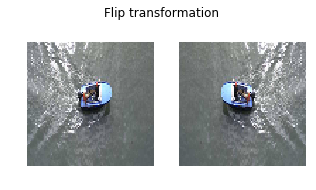

In [12]:
plot_example(img, flip_image(img, True), 'Flip transformation')

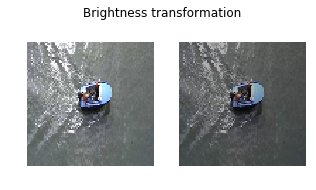

In [13]:
plot_example(img, brightness_image(img), 'Brightness transformation')

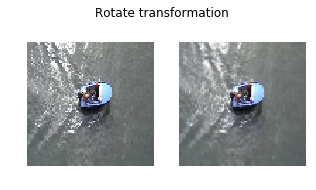

In [14]:
plot_example(img, rotate_image(img), 'Rotate transformation')

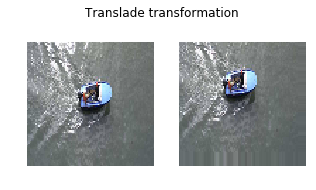

In [15]:
plot_example(img, translate_image(img), 'Translade transformation')

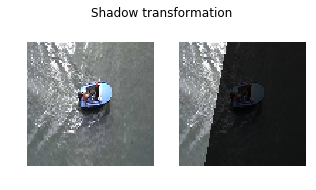

In [16]:
plot_example(img, shadow_image(img), 'Shadow transformation')

The function below selects randomly samples from the samples vector and applies the transformations above in order to match the number of examples of the biggest class. After the transformation is applied it also saves it as a pickle file, so it is not necessary to redo this in the future.

In [17]:
def augment_image(X, y):
    
    # Class with more samples
    n_max = 0
    for i in dict_train:
        index_dic = dict_train[i]
        n_max = max(n_max, (y == index_dic).sum())
    
    # Generate new random images
    for i in dict_train:
        index_dic = dict_train[i]
        n_actual = (y == index_dic).sum()
        n_class = n_max - n_actual
        
        if n_class != 0:
            index = [j for j,v in enumerate(y == index_dic) if v]

            indexes = [random.choice(index) for _ in range(n_class)]

            pbar = tqdm(range(n_class))
            pbar.set_description('Processing \'' +
                                 dict_test_inverse[index_dic] + '\'')

            for j in pbar:

                img = np.copy(X[indexes[j]])

                # Apply transformations
                img = flip_image(img)
                img = brightness_image(img)
                img = rotate_image(img)
                img = translate_image(img)
                img = shadow_image(img)

                X = np.vstack([X, np.reshape(img,
                                [1, size_image, size_image, 3])])
                y = np.append(y, y[indexes[j]])
            
    return X, y

# load training files
if os.path.isfile('training_augmented.p'):
    print('Training augmented file found!')
    with open('training_augmented.p', mode='rb') as f:
        train = pickle.load(f)
    X_train, y_train = train['features'], train['labels']
else:
    X_train, y_train = augment_image(X_train, y_train)
    
    # Save augmented data
    save_data(X_train, y_train, 'training_augmented')
    print('Training augmented saved to file!')

Processing 'Snapshot Acqua': 100%|█████████████████████████████████████████████████████| 42/42 [00:03<00:00, 12.28it/s]


Training augmented saved to file!


And now, it is possible to check that each class has the same number of examples, what will impact in the classifier training.

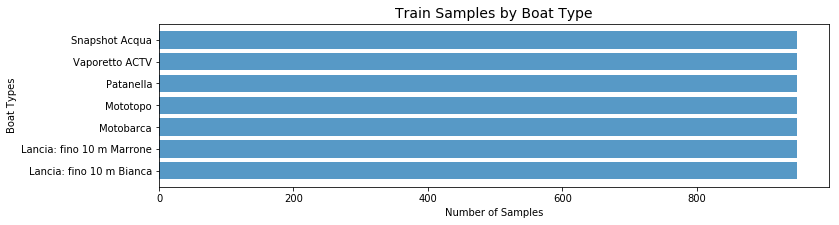

In [18]:
plot_sample_class_distributions(samples=y_train,
                                title='Train Samples by Boat Type')

Also, it is important to show again random examples of the new dataset with the augmented images.

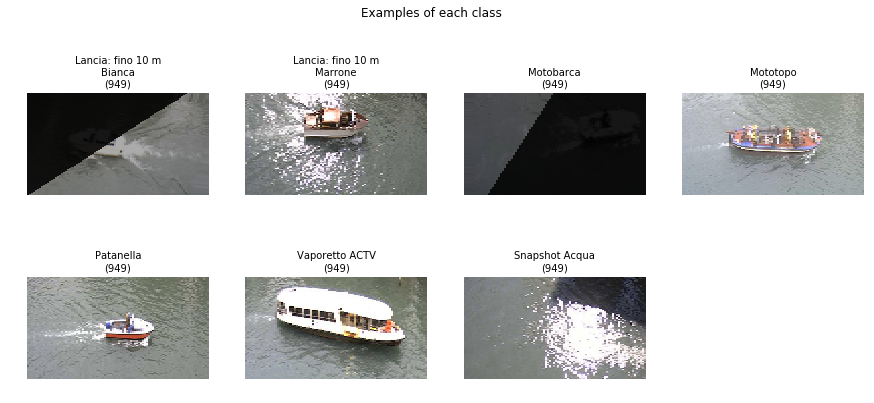

In [19]:
visualize_data(X_train, y_train)

## Preprocess data
The data has already being preprocessed in the last few lines of code, however, before, the process was to create the dataset. Now the preprocess that need to be done is to feed this data to the Convolutional Neural Network.

There are three important preprocess in this step:

* Shuffle - used to avoid mini batches during training
* Normalization - used to improve convergence in gradient descent (this is not implemented here, will be implemented in the model)
* One-hot encode labels - used to represent the classes where each bit is one class and not an int number

In [20]:
# One Hot encode the labels to the variable y_one_hot
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(y_train)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Encode labels
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

# Change to float32, so it can be multiplied
# against the features in TensorFlow, which are float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

## Architecture
Below is described the architecture to train the classifier. The classifier chosen was the LeNet, which is a straightforward and small classifier that can be trained in a not very good graphic card and even a CPU.

The LeNet architecture was first introduced by LeCun et al. in their 1998 paper, [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). As the name of the paper suggests, the authors’ implementation of LeNet was used primarily for OCR and character recognition in documents.

Below is also plotted the model, with the sizes of the input and output of each layer of the LeNet architecture.

In [21]:
from keras.models import Sequential
from keras.layers import Lambda, Activation, Conv2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.utils.vis_utils import plot_model

height, width, depth = X_train[0].shape

def lenet(width, height, depth, classes, weightsPath=None):
    model = Sequential()
    
    model.add(Lambda(lambda x: x/127.5 - 1.,
        input_shape=(width,height,depth),
        output_shape=(width,height,depth)))

    # first set of CONV => RELU => POOL
    model.add(Conv2D(20, (5, 5), padding="same",
                     input_shape=(depth, height, width)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))    

    # second set of CONV => RELU => POOL
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    # if a weights path is supplied (inicating that the model was
    # pre-trained), then load the weights
    if weightsPath is not None:
        model.load_weights(weightsPath)
        
    # return the constructed network architecture
    return model

model = lenet(width, height, depth, n_classes, weightsPath=None)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 90, 90, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 45, 45, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 50)        0         
__________

## Training
After defining the architecture, it is necessary to really train the classifier. This classifier is using the Adam Optimizer, 10 epochs and a batch size of 20 images.

Below is printed the time, loss and accuracy of each epoch.

In [22]:
# Initialize the optimizer and model
print("Training model...")
opt = optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=opt, metrics=["accuracy"])

# Train model if there is no pre-existing one
history = model.fit(X_train, y_train, batch_size=20, epochs=10, verbose=2)

Training model...
Epoch 1/10
 - 96s - loss: 1.0272 - acc: 0.6071
Epoch 2/10
 - 94s - loss: 0.6912 - acc: 0.7352
Epoch 3/10
 - 93s - loss: 0.5593 - acc: 0.7834
Epoch 4/10
 - 106s - loss: 0.3962 - acc: 0.8457
Epoch 5/10
 - 98s - loss: 0.2730 - acc: 0.8973
Epoch 6/10
 - 93s - loss: 0.1905 - acc: 0.9305
Epoch 7/10
 - 93s - loss: 0.1166 - acc: 0.9583
Epoch 8/10
 - 93s - loss: 0.1347 - acc: 0.9551
Epoch 9/10
 - 94s - loss: 0.0952 - acc: 0.9699
Epoch 10/10
 - 93s - loss: 0.0525 - acc: 0.9828


This is the function used to plot the results of the classifier training.

In [23]:
def plot_iteration_graph(data, title, xlabel, ylabel):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(9, 4)
    ax = fig.add_subplot(111)
    
    dim = np.arange(1,len(data)+1,1);
    ax.plot(dim,data)
    ax.axis([1, len(data), min(data) - 0.05, max(data) + 0.05])

    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontsize = 14)

# Results

For the training set it is possible to obtain a higher accuracy, however, it is necessary to test in images never seen before to get the real accuracy of the model.

So, running the classifier with the test set it is possible to obtain the following accuracy presented below.

In [24]:
# show the accuracy on the testing set
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=100, verbose=2)
print("Test Accuracy:\t{:.2f}%".format(accuracy * 100))

Test Accuracy:	86.01%


It is also interesting to plot the accuracy and loss over time to see the evolution of the training. In the images below it is possible to see how the accuracy improves over the epochs, towards 100% and the loss decreases to almost 0.

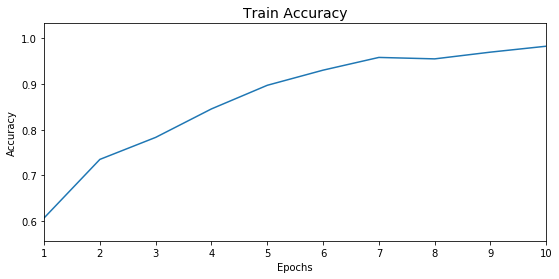

In [25]:
plot_iteration_graph(history.history['acc'],
                     'Train Accuracy','Epochs', 'Accuracy')

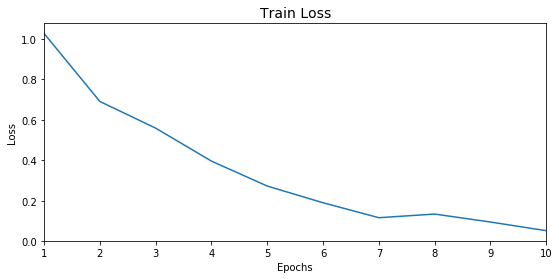

In [26]:
plot_iteration_graph(history.history['loss'],
                     'Train Loss', 'Epochs', 'Loss')

# Further improvements

In this project it was possible to have good results using the simplest classifier known, however it can be improved and achieve  much better results. Also, this training was most limited by the hardware being used, which do not allow to train with higher image sizes and more classes.

Another test that I would like to do is to use a pre-trained classifier, as the [VGG-16](http://www.robots.ox.ac.uk/~vgg/research/very_deep/), and retrain only the last layers in order to learn how to classify the boats in this dataset.

Besides this, it is also possible to improve the augmentation of the images (zoom, other transformations) and train each epoch with new augmented generated images.